### 1.1 Basic Python Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as m
import matplotlib.pyplot as plt


%matplotlib inline

### 1.2 Handle Warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

### 1.3 Import Scikit Learn Library 

In [3]:
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### 1.4 Import StatsModel Library

In [4]:
import statsmodels.api as sm
from scipy import stats
#to get the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


# 2. Data Sourcing & Inspection

### 2.1 Import Dataset

In [5]:
bike_df = pd.read_csv("day.csv")

### 2.2 Data Inspection

In [6]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
bike_df.shape

(730, 16)

**Observations :**
    
    1. Total number of rows : 731
    2. Total number of columns : 16

In [8]:
# check for datatypes
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**Observations :**
    
    1. We have just one column with Object data type, however it contains Dates.
    2. Majority of the columns have int data type, while a few are float
    3. Some categorical fields have numerical data types (will analyse & convert them to categorical if needed)






In [9]:
#check for numerical summary
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
#check for columns present in dataset
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### 2.3 Check for Nulls

In [11]:
null_count = bike_df.isnull().sum()
print(null_count)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


#### We have no null values present in any column of the dataset

### 2.4 Check for Duplicates

In [12]:
dup_df = bike_df.copy()

In [13]:
dup_df.drop_duplicates(inplace= True)

In [14]:
dup_df.shape

(730, 16)

In [15]:
bike_df.shape

(730, 16)

**No change in shape signifies we don't have any duplicate value present in our dataset**

### 2.5 Data Cleaning

In [16]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**As observed** :
    
    Columns : season, yr, month, holiday, weekday and weathersit despite being categorical in nature have int64 as datatype. 
        
**We can instead map some of these columns with the given details from data dictionary (Dataset Characteristics)**

#### 2.5.1 season

In [17]:
bike_df.season.describe()

count    730.000000
mean       2.498630
std        1.110184
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: season, dtype: float64

**It is clearly a categorical nominal data. We can map it to the respective seasons in order to draw better inference :**
    
        1: spring
        2: summer
        3: fall
        4: winter

In [18]:
bike_df['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}, inplace =True)


In [19]:
 bike_df['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [20]:
bike_df['weathersit'].replace({1: 'Clear/Partly cloudy', 2: 'Mist/Cloudy', 3: 'Light-Snow/Rain/Storm'}, inplace =True)

#since fourth category isn't present in our dataset, we don't need to map it

In [21]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,Mist/Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,Clear/Partly cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,Clear/Partly cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,Clear/Partly cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [22]:
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [23]:
# creating a new data set without columns : instant, dteday casual and registered

new_bike = bike_df[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','cnt']]

In [24]:
new_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 68.6+ KB


#### 2.5.6 Fix datatype

Setting up the right datatype for all numerical columns using pd.to_numeric()

In [25]:
new_bike[['temp', 'atemp', 'hum', 'windspeed','cnt']] = new_bike[['temp', 'atemp', 'hum', 'windspeed','cnt']].apply(pd.to_numeric)

In [26]:
new_bike.info()

#already correct - verified

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 68.6+ KB


In [27]:
# It's visible that even some of the categorical variables have float64/int64 datatype.
## We can convert these to object type

new_bike['mnth'] = new_bike['mnth'].astype('object')
new_bike['weekday'] = new_bike['weekday'].astype('object')
new_bike['season'] = new_bike['season'].astype('object')
new_bike['weathersit'] = new_bike['weathersit'].astype('object')



# 3. EDA

#### 3.1 Numerical variables analysis

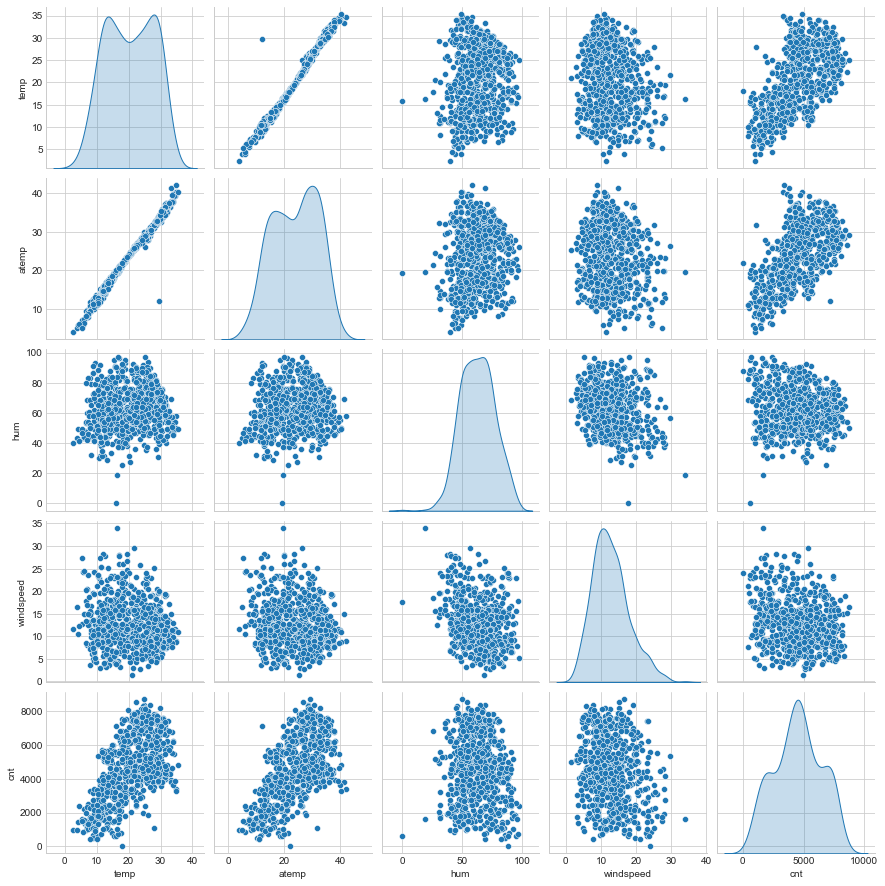

In [28]:
num_vars = new_bike[['temp', 'atemp', 'hum', 'windspeed','cnt']]
plt.style.use('seaborn-whitegrid')
sns.pairplot(num_vars, diag_kind='kde')
plt.show()

**Inference :** From the above pair plot it can be clearly observed that there exists a linear relationship between :
        
        temp
        
        atemp
        
        cnt

**It is evident that we have two similar fields :**
    
    - temp : temperature in Celsius
    - atemp: feeling temperature in Celsius
        
We can check if there exists a positive correlation between them

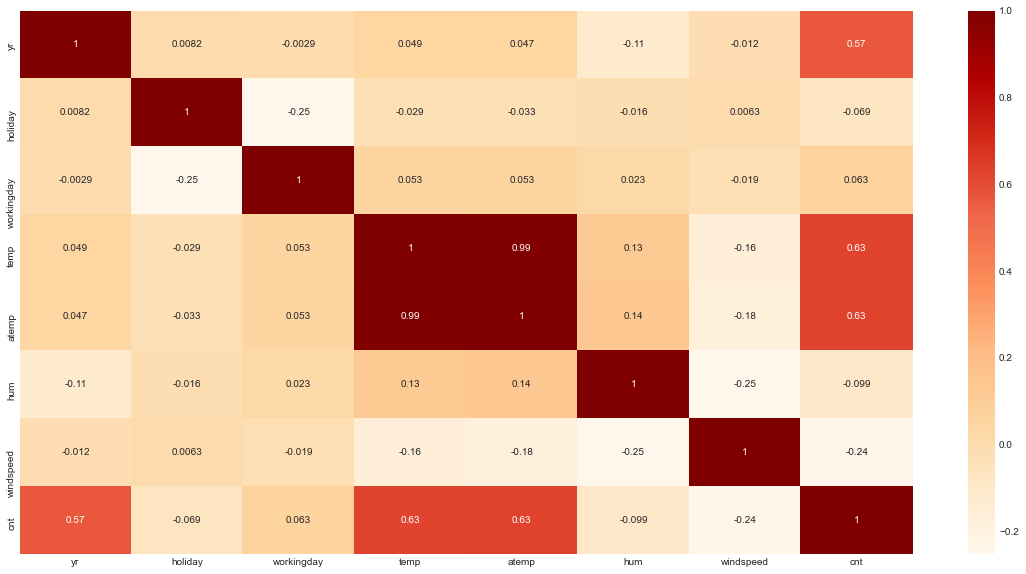

In [29]:
# using heatmap to check correlation

plt.figure(figsize=(20,10))
sns.heatmap(new_bike.corr(), annot = True, cmap="OrRd")
plt.show()

**Inference** : As suspected, there is 99% correlation between temp and atemp. 
    
    We can hence drop one of these later while building our model.

#### 3.2 Categorical variables analysis

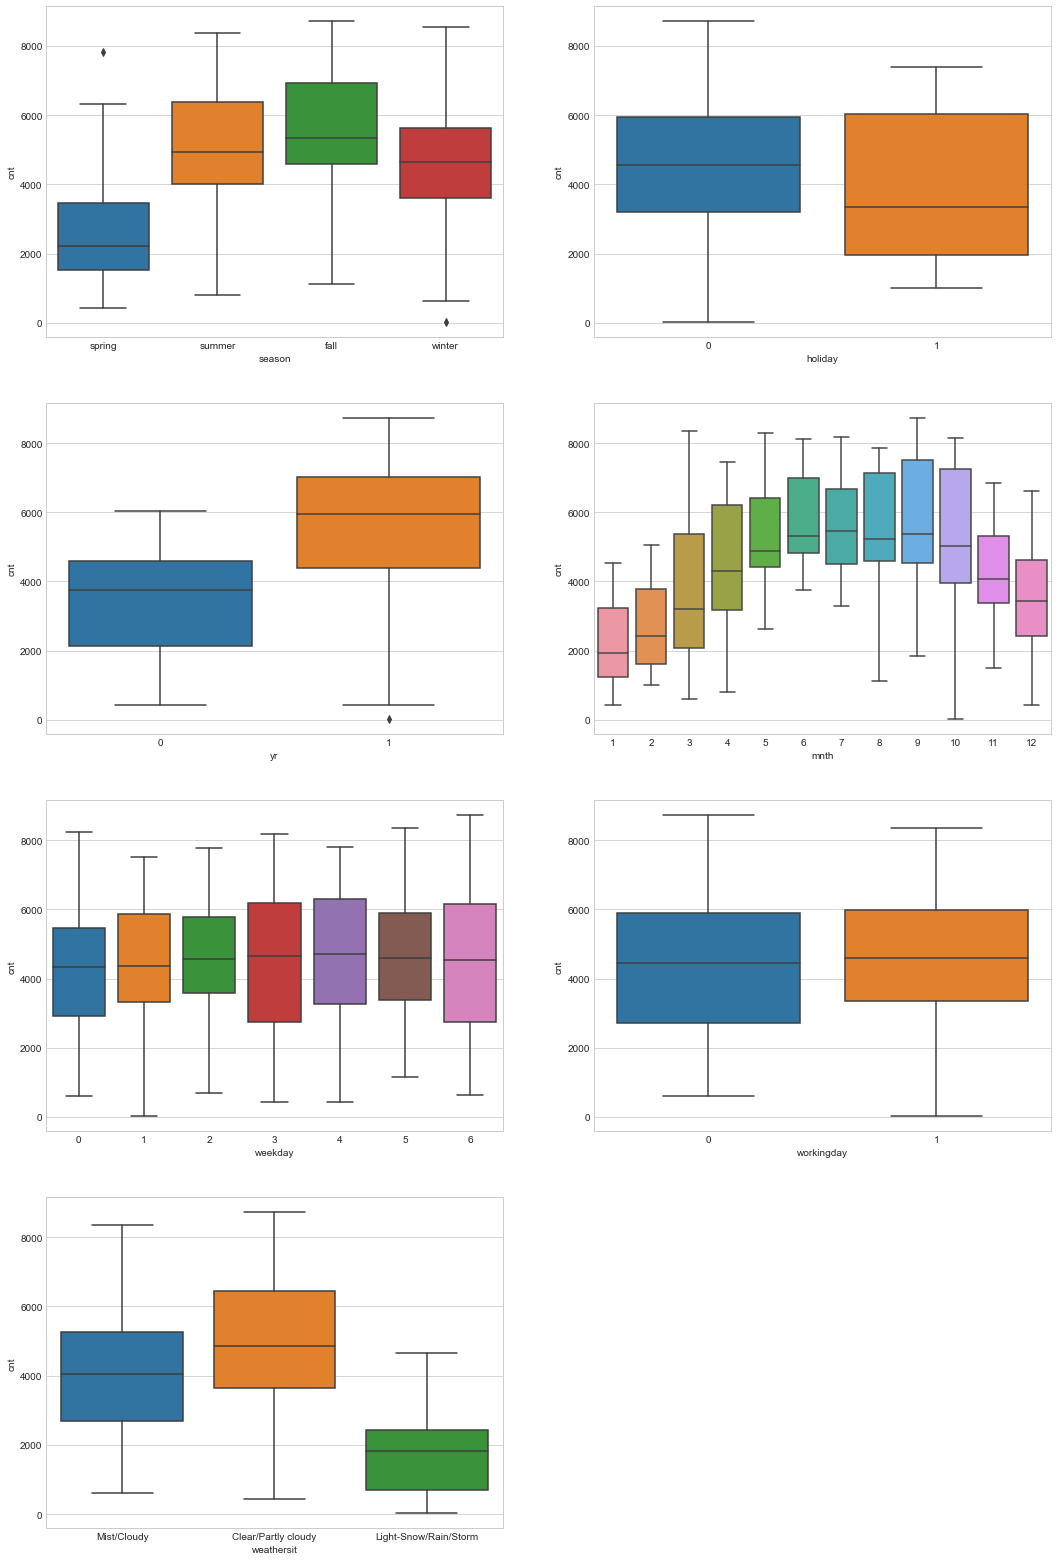

In [30]:
## Use subplots to analyse predictors (categorical variables) against target variable 'cnt' and outliers (if any)

plt.figure(figsize=(18, 28))
plt.style.use('seaborn-whitegrid')

plt.subplot(4,2,1)
sns.boxplot(x='season', y='cnt', data= new_bike)

plt.subplot(4,2,2)
sns.boxplot(x='holiday', y='cnt', data= new_bike)

plt.subplot(4,2,3)
sns.boxplot(x='yr', y= 'cnt', data= new_bike)

plt.subplot(4,2,4)
sns.boxplot(x='mnth', y='cnt', data= new_bike)

plt.subplot(4,2,5)
sns.boxplot(x='weekday', y='cnt', data= new_bike)

plt.subplot(4,2,6)
sns.boxplot(x='workingday', y='cnt', data= new_bike)

plt.subplot(4,2,7)
sns.boxplot(x='weathersit', y='cnt', data= new_bike)

plt.show()

#### 3.3 Distribution of variables across rental cnt


In [31]:
# Generic function to plot graphs

def distribution(data, title, x_label, y_label):
    plt.figure(figsize=(8,5))
    plt.style.use('seaborn-pastel')
    density = sns.barplot(x=data.index, y=data.values)
    title = plt.title(title, fontdict={'fontsize': 20})
    plt.xlabel(x_label)
    plt.ylabel(y_label)
plt.show()

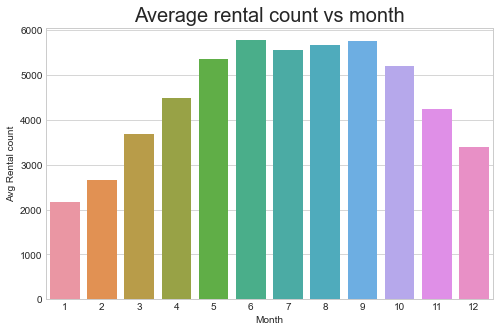

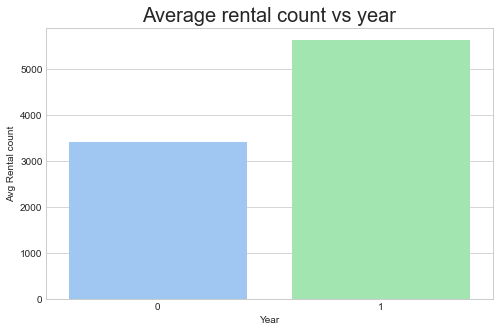

In [32]:
#month vs rental count
dist1 = bike_df.groupby(by= 'mnth').cnt.mean()
distribution(data=dist1, title = 'Average rental count vs month', x_label = 'Month', y_label='Avg Rental count')

#yr vs rental count
dist2 = bike_df.groupby(by='yr').cnt.mean()
distribution(data=dist2, title = 'Average rental count vs year', x_label = 'Year', y_label='Avg Rental count')

#### Inference :

**Plot 1 :** Highest rental counts during July-Sept (fall season) and lowest during Dec-Feb (extreme weather)
    
**Plot 2 :** Rental counts are almost twice for year 1 as compared to year 0

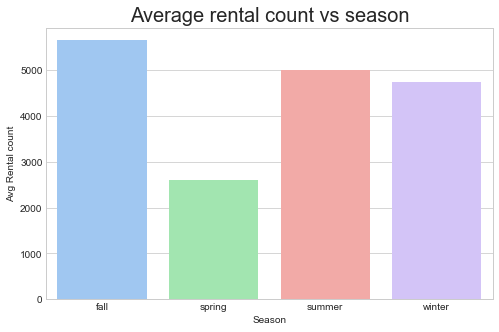

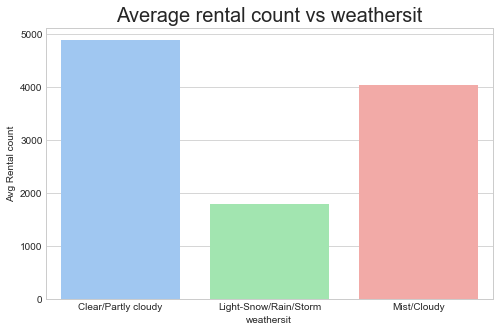

In [33]:
# season vs rental count
dist1 = bike_df.groupby(by='season').cnt.mean()
distribution(data=dist1, title = 'Average rental count vs season', x_label = 'Season', y_label='Avg Rental count')

# weathersit vs rental count
dist2 = bike_df.groupby(by='weathersit').cnt.mean()
distribution(data=dist2, title = 'Average rental count vs weathersit', x_label = 'weathersit', y_label='Avg Rental count')

#### Inference :

**Plot 1 :** Highest rental counts during fall season and lowest during sprimg season
    
**Plot 2 :** Highest rental counts during weather pattern clear/partly cloudy and lowest during light snow/rain/storm

# 4. Dummy Variable Creation

**Steps :**

1. **Creating dummy variables** for four major categorical variables :
    
    > mnth
    
    > weathersit
    
    > season
    
    > weekday
    
    
    
2. **Drop original categorical variables** once dummies have been created


3. **Drop the first value** for each of the dummy variables

In [34]:
new_bike = pd.get_dummies(new_bike, drop_first=True)
new_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   yr                                730 non-null    int64  
 1   holiday                           730 non-null    int64  
 2   workingday                        730 non-null    int64  
 3   temp                              730 non-null    float64
 4   atemp                             730 non-null    float64
 5   hum                               730 non-null    float64
 6   windspeed                         730 non-null    float64
 7   cnt                               730 non-null    int64  
 8   season_spring                     730 non-null    uint8  
 9   season_summer                     730 non-null    uint8  
 10  season_winter                     730 non-null    uint8  
 11  mnth_2                            730 non-null    uint8  
 12  mnth_3  

In [35]:
new_bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light-Snow/Rain/Storm,weathersit_Mist/Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,1,0,0,0,0,0


In [36]:
new_bike.shape

(730, 30)

Row count pre split : 730
    
Column vount pre split : 30

##5. Split Data : Train and Test

Splitting the entire data set in the two parts using train_test_split method from SKLEARN library in the ratio of 80:20 :
    
   **TRAIN : 80%**
    
   **TEST : 20%**

In [37]:
## In order to ensure both train and test parts have the same number of rows, we need to specify random_state
## using random.seed() from numpy to implement this.

np.random.seed(0)
bike_train, bike_test = train_test_split(new_bike, train_size = 0.8, test_size = 0.2, random_state = 111)

In [38]:
bike_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 520 to 724
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   yr                                584 non-null    int64  
 1   holiday                           584 non-null    int64  
 2   workingday                        584 non-null    int64  
 3   temp                              584 non-null    float64
 4   atemp                             584 non-null    float64
 5   hum                               584 non-null    float64
 6   windspeed                         584 non-null    float64
 7   cnt                               584 non-null    int64  
 8   season_spring                     584 non-null    uint8  
 9   season_summer                     584 non-null    uint8  
 10  season_winter                     584 non-null    uint8  
 11  mnth_2                            584 non-null    uint8  
 12  mnth_3

#### 5.1 Inspect dataset post split

In [39]:
bike_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 358 to 472
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   yr                                146 non-null    int64  
 1   holiday                           146 non-null    int64  
 2   workingday                        146 non-null    int64  
 3   temp                              146 non-null    float64
 4   atemp                             146 non-null    float64
 5   hum                               146 non-null    float64
 6   windspeed                         146 non-null    float64
 7   cnt                               146 non-null    int64  
 8   season_spring                     146 non-null    uint8  
 9   season_summer                     146 non-null    uint8  
 10  season_winter                     146 non-null    uint8  
 11  mnth_2                            146 non-null    uint8  
 12  mnth_3

In [40]:
bike_train.shape

(584, 30)

As 80% of 730 = 584

In [41]:
bike_test.shape

(146, 30)

As 20 % of 730 = 146

#### 5.2 Check the correlation among all variables (after adding dummies)



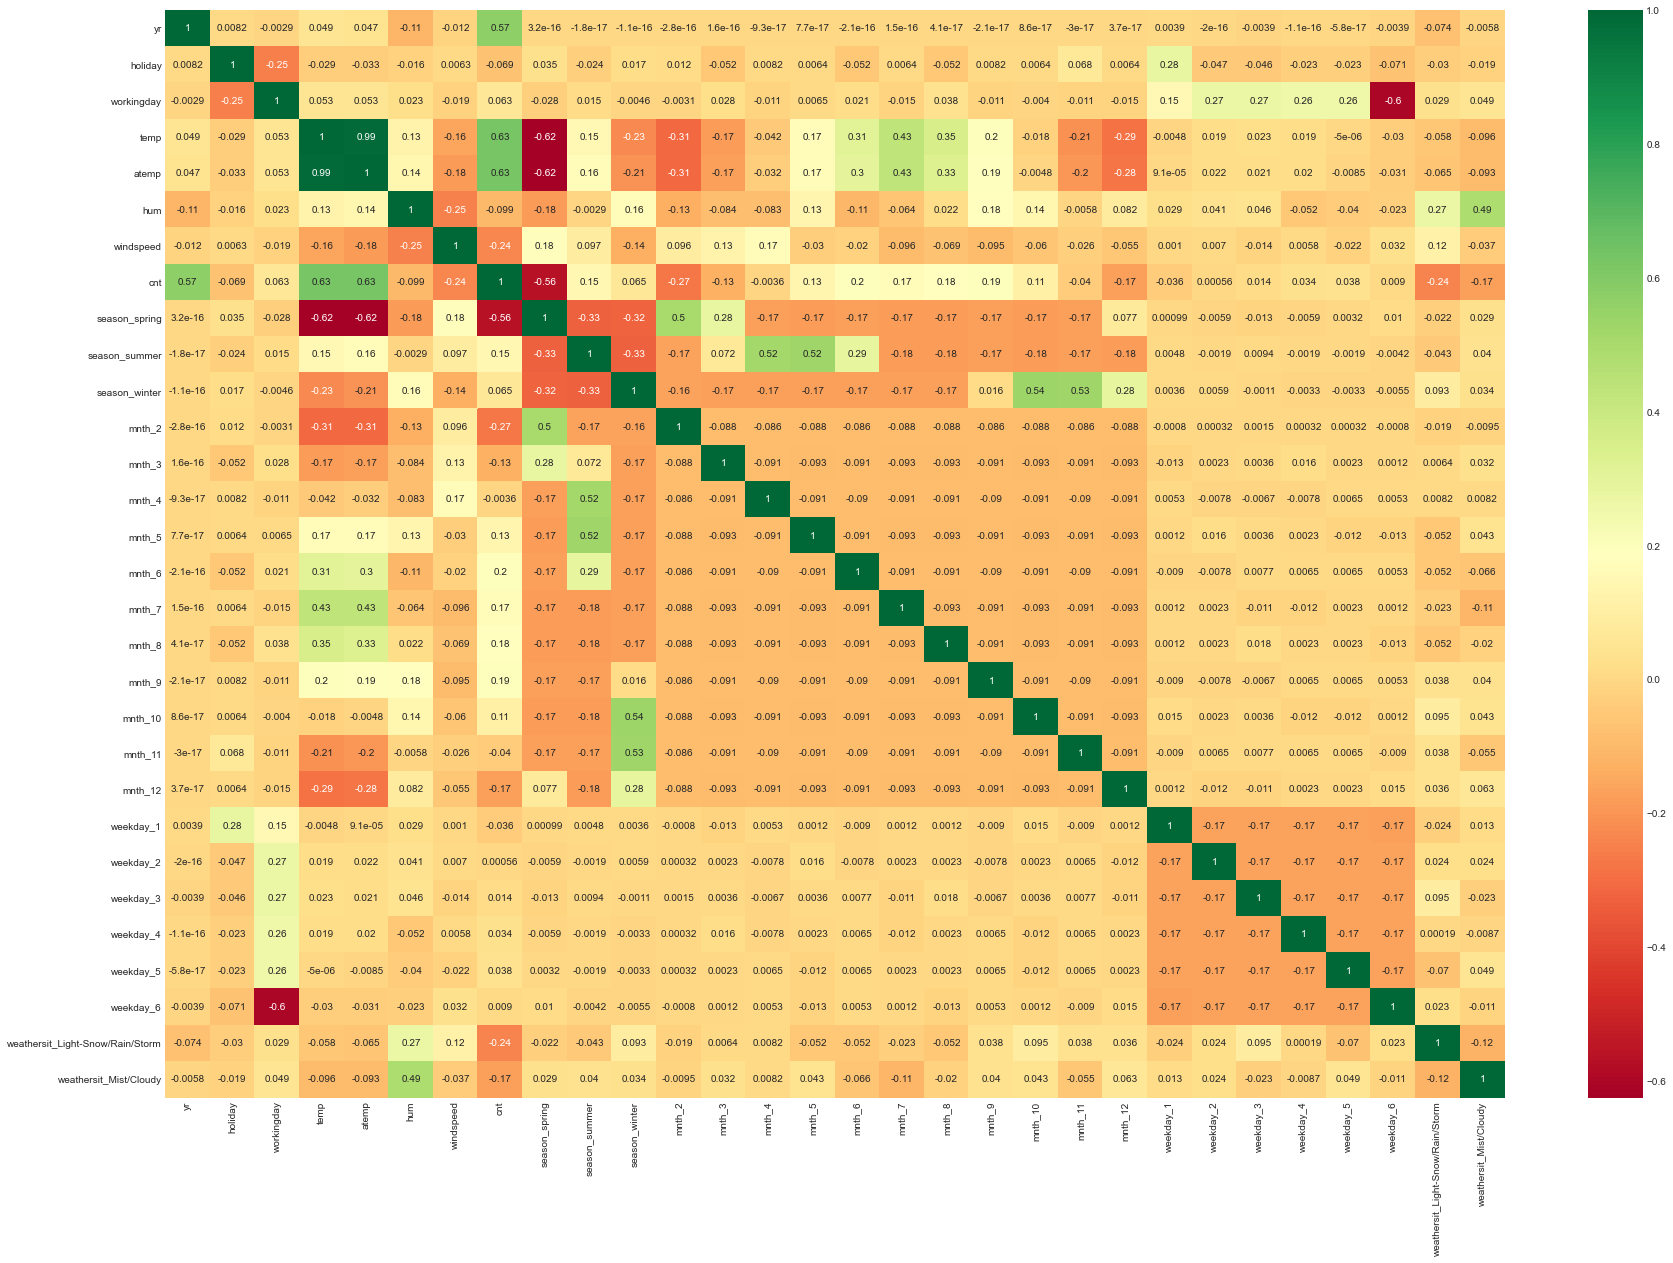

In [42]:
plt.figure(figsize = (30,20))
sns.heatmap(new_bike.corr(), annot = True, cmap = "RdYlGn")
plt.show()

#### Inferences :

   - Variables having a **high collinearity with target variable 'cnt'** :
        
        atemp (0.63)
        
        yr  (0.57)
        
        season spring (-0.56)
        
        
        
        
        
   - Variables having a **high to moderate collinearity with each other** :
        
        temp and atemp (0.99)
        
        hum and weathersit_Mist/Cloudy  (0.49)
        
        season_winter and mnth_10 (0.54), mnth_11  (0.53)
        
        season_summer and mnth_4 (0.54), mnth_5  (0.54)
        
        atemp and mnth_7  (0.43)
        
        mnth_2 and season_spring (0.5)
    
        


# 5. Feature Scaling

In [43]:
scale =  MinMaxScaler()

In [44]:
# before rescaling
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light-Snow/Rain/Storm,weathersit_Mist/Cloudy
520,1,0,1,22.174153,26.29460,61.3333,14.041525,7001,0,1,...,0,0,0,1,0,0,0,0,0,1
89,0,0,1,11.001653,12.87875,91.8333,14.582282,1685,0,1,...,0,0,0,0,0,1,0,0,1,0
354,0,0,1,17.561653,21.40085,85.8333,14.833800,2660,1,0,...,0,1,0,0,1,0,0,0,0,1
121,0,0,1,22.515847,26.64165,73.0000,12.291418,4401,0,1,...,0,0,1,0,0,0,0,0,0,1
687,1,0,1,15.614153,18.78105,62.3333,15.749489,5499,0,0,...,1,0,1,0,0,0,0,0,0,1


In [45]:
# Apply scaler on the numerical variables of train dataset

bike_num = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_train[bike_num] = scale.fit_transform(bike_train[bike_num])

In [46]:
#post rescaling
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light-Snow/Rain/Storm,weathersit_Mist/Cloudy
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.486301,0.027397,0.691781,0.546698,0.522772,0.523951,0.418017,0.502523,0.243151,0.251712,...,0.085616,0.077055,0.148973,0.145548,0.133562,0.150685,0.140411,0.150685,0.023973,0.332192
std,0.500241,0.163378,0.462153,0.227567,0.213071,0.192856,0.190444,0.232892,0.429353,0.434369,...,0.280037,0.266907,0.356367,0.352955,0.340472,0.358048,0.347711,0.358048,0.153095,0.471403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.346603,0.338253,0.372244,0.278404,0.342565,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.556613,0.540924,0.525522,0.393453,0.506832,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.746117,0.700253,0.663718,0.527203,0.673283,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light-Snow/Rain/Storm,weathersit_Mist/Cloudy
520,1,0,1,0.600225,0.586515,0.499999,0.468095,0.808715,0,1,...,0,0,0,1,0,0,0,0,0,1
89,0,0,1,0.260677,0.234312,0.924593,0.488278,0.154357,0,1,...,0,0,0,0,0,1,0,0,1,0
354,0,0,1,0.460045,0.458041,0.841067,0.497666,0.274372,1,0,...,0,1,0,0,1,0,0,0,0,1
121,0,0,1,0.610610,0.595626,0.662413,0.402773,0.488676,0,1,...,0,0,1,0,0,0,0,0,0,1
687,1,0,1,0.400857,0.389264,0.513920,0.531843,0.623831,0,0,...,1,0,1,0,0,0,0,0,0,1



# 6. Build Linear Model

We will make use of **RFE and LinearRegression libraries** from sklearn for implementing Linear Regression using Recurssive feature elimination

We need 2 variables in order to build a model : X and Y
    
    Y : Target variable (dependent)
    X : Predictor variables (independent)
        
We have around 28 columns (variables), excluding the target variable. Since it isn't easy to analyse all these predictors, will consider **15 variables** to start with.

**RFE** method shall be used here to which we will provide the arbitrarily chosen 15 predictors (as 1, and others as 0).

### 6.1 Feature selection using RFE

In [48]:
# creating y variable to hold our taget variable : cnt
y = bike_train.pop('cnt')

In [49]:
x = bike_train

In [50]:
lr = LinearRegression()

In [51]:
# using Linearregression().fit() in order to get the right fitting model

lr.fit(x, y)

LinearRegression()

In [52]:
#Apply RFE with 15 output variables

r = RFE(lr, n_features_to_select = 15)

In [53]:
#using Linearregression().fit() in order to get the right fitting model
r = r.fit(x, y)

In [54]:
#creating a new dataframe to store columns along with their respective ranks and support values (status) 

r_bike = pd.DataFrame ({'Predictors' : x.columns, 'Status' : r.support_, 'Rank' : r.ranking_})

In [55]:
r_bike.sort_values(by = 'Rank')

,Predictors,Status,Rank
0,yr,True,1
18,mnth_10,True,1
17,mnth_9,True,1
16,mnth_8,True,1
27,weathersit_Light-Snow/Rain/Storm,True,1
13,mnth_5,True,1
12,mnth_4,True,1
11,mnth_3,True,1
9,season_winter,True,1
14,mnth_6,True,1


#### Now we have our 15 chosen predictors evaluated by RFE.

The ones ranked as 1 are the top predictors which will have a major impact on the outcome.

**However, it is not a good practice to fully rely on this and hence we must validate this further using different models and eliminate the features that aren't required or doesn't satify a given criteria.**

In [56]:
## we now create a new general function for further calculating the VIF (variance inflation factor) for our models.

def get_vif(df):
    vif_pred =  pd.DataFrame()
    vif_pred['Predictors']  = df.columns
    
    vif_pred['VIF_Value'] = [variance_inflation_factor(df.values, v) for v in range(df.shape[1])]
    vif_pred['VIF_Value'] = round(vif_pred['VIF_Value'], 2) 
    
    vif_pred = vif_pred.sort_values(by = 'VIF_Value', ascending = False)
    vif_pred = vif_pred.reset_index(drop=True)
    return vif_pred

### 6.2 Model building using STATS MODEL

We will use StatsModel now in order to build different models

#### 6.2.1  MODEL-1

In [57]:
## VIF 

get_vif(x)

,Predictors,VIF_Value
0,weekday_3,inf
1,workingday,inf
2,weekday_2,inf
3,weekday_1,inf
4,weekday_5,inf
5,weekday_4,inf
6,holiday,inf
7,temp,1381.94
8,atemp,1307.25
9,hum,17.74


In [58]:
#extracting all columns with "True" status, i.e RFE selected variables and storing them in new_col

new_col = x.columns[r.support_]
new_col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_8',
       'mnth_9', 'mnth_10', 'weathersit_Light-Snow/Rain/Storm'],
      dtype='object')

In [59]:
#checking out variables/columns rejected by RFE
x.columns[~r.support_]


Index(['holiday', 'workingday', 'season_summer', 'mnth_2', 'mnth_7', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_Mist/Cloudy'],
      dtype='object')

In [60]:
# creating a new dataframe x_rfe with RFE selected variables

x_rfe = x[new_col]

In [61]:
# create Model-1

#adding constant
x_lr1 = sm.add_constant(x_rfe)

#creating a fitted model using fit()
lr_m1 = sm.OLS(y, x_lr1).fit()

In [62]:
# check the obtained parameters from first generated model

lr_m1.params

const                               0.269037
yr                                  0.244283
temp                               -0.278307
atemp                               0.783858
hum                                -0.253518
windspeed                          -0.120415
season_spring                      -0.095025
season_winter                       0.087055
mnth_3                              0.048776
mnth_4                              0.054108
mnth_5                              0.100603
mnth_6                              0.067302
mnth_8                              0.060063
mnth_9                              0.136265
mnth_10                             0.066144
weathersit_Light-Snow/Rain/Storm   -0.117178
dtype: float64

In [63]:
## Get the summary of linear regression result for model 1

print(lr_m1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     208.6
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.64e-219
Time:                        17:01:15   Log-Likelihood:                 569.78
No. Observations:                 584   AIC:                            -1108.
Df Residuals:                     568   BIC:                            -1038.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

#### Inferences :

- Highest VIF value variables : atemp (p-val = 0.007) and temp (p-val = 0.331)
    
- p-val > 0.05 variables : temp(0.331) and holiday(0.417)
    
- R-squared : 0.848
    
- Adj-R squared : 0.845

    
**As "temp" variable is common for both, VIF > 5 and p-val > 0.05, it needs to be dropped**

### 6.2.2 MODEL-2

We proceed after removing **temp due to it's high VIF as well as p-val > 0.05** and redesigning the model

In [64]:
new_col = new_col.drop(['temp'])
x_rfe = x[new_col]

In [65]:
## VIF

get_vif(x_rfe)

,Predictors,VIF_Value
0,atemp,10.62
1,hum,9.93
2,windspeed,5.67
3,season_winter,3.05
4,season_spring,2.84
5,yr,1.99
6,mnth_5,1.75
7,mnth_8,1.75
8,mnth_6,1.66
9,mnth_10,1.66


In [66]:
# create Model-2

#adding constant
x_lr2 = sm.add_constant(x_rfe)

#creating a fitted model using fit()
lr_m2 = sm.OLS(y, x_lr2).fit()

In [67]:
# check the obtained parameters from second generated model

lr_m2.params

const                               0.268896
yr                                  0.244382
atemp                               0.494169
hum                                -0.250811
windspeed                          -0.128333
season_spring                      -0.092295
season_winter                       0.090699
mnth_3                              0.049971
mnth_4                              0.058281
mnth_5                              0.101471
mnth_6                              0.065240
mnth_8                              0.056794
mnth_9                              0.133352
mnth_10                             0.066037
weathersit_Light-Snow/Rain/Storm   -0.120988
dtype: float64

In [68]:
## Get the summary of linear regression result for model 2

print(lr_m2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     223.2
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          2.27e-220
Time:                        17:01:15   Log-Likelihood:                 569.01
No. Observations:                 584   AIC:                            -1108.
Df Residuals:                     569   BIC:                            -1042.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

#### Inferences :

- Highest VIF value variables :  and atemp 
    
- p-val < 0.05 for all variables 
    
- R-squared : 0.838
    
- Adj-R squared : 0.834

    
**As all p-values are within limits we will drop hum due to it's high VIF**

### 6.2.3 MODEL-3

We now proceed after removing **holiday** due giving a priority to p-val : 0.426


In [69]:
new_col = new_col.drop(['hum'])
x_rfe = x[new_col]

In [70]:
## VIF 

get_vif(x_rfe)

,Predictors,VIF_Value
0,atemp,6.38
1,windspeed,5.62
2,season_winter,2.32
3,season_spring,2.06
4,yr,1.97
5,mnth_8,1.73
6,mnth_6,1.66
7,mnth_10,1.66
8,mnth_5,1.56
9,mnth_4,1.50


In [71]:
# create Model-3

#adding constant
x_lr3 = sm.add_constant(x_rfe)

#creating a fitted model using fit()
lr_m3 = sm.OLS(y, x_lr3).fit()

In [72]:
# check the obtained parameters from third generated model

lr_m3.params

const                               0.154717
yr                                  0.255114
atemp                               0.448621
windspeed                          -0.072085
season_spring                      -0.111156
season_winter                       0.064954
mnth_3                              0.040289
mnth_4                              0.046687
mnth_5                              0.060861
mnth_6                              0.073547
mnth_8                              0.045003
mnth_9                              0.106602
mnth_10                             0.054823
weathersit_Light-Snow/Rain/Storm   -0.223240
dtype: float64

In [73]:
## Get the summary of linear regression result for model 3

print(lr_m3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     192.4
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.29e-198
Time:                        17:01:15   Log-Likelihood:                 514.65
No. Observations:                 584   AIC:                            -1001.
Df Residuals:                     570   BIC:                            -940.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

#### Inferences :

- Highest VIF value variables : workingday (13.06) and hum (14.13)
    
- p-val > 0.05 variables :  weekday_Sunday(0.154)
    
- R-squared : 0.848
    
- Adj-R squared : 0.845

    
**As p-val holds a priority than VIF, for "weekday_Sunday" it is still at the border mark of 5 and infact increased, it needs to be dropped**

### 6.2.4 MODEL-4

We will now drop **weekday_Sunday, due to it's high p-val : 0.154** and redesigning the model

In [74]:
new_col = new_col.drop(['windspeed'])
x_rfe = x[new_col]

In [75]:
## VIF 

get_vif(x_rfe)

,Predictors,VIF_Value
0,atemp,5.10
1,season_winter,2.08
2,yr,1.97
3,mnth_8,1.71
4,mnth_10,1.66
5,mnth_6,1.63
6,mnth_5,1.51
7,season_spring,1.44
8,mnth_9,1.40
9,mnth_4,1.28


In [76]:
# create Model-4

#adding constant
x_lr4 = sm.add_constant(x_rfe)

#creating a fitted model using fit()
lr_m4 = sm.OLS(y, x_lr4).fit()

In [77]:
# check the obtained parameters from fourth generated model

lr_m4.params

const                               0.121037
yr                                  0.254674
atemp                               0.458879
season_spring                      -0.112627
season_winter                       0.068197
mnth_3                              0.034756
mnth_4                              0.037146
mnth_5                              0.059621
mnth_6                              0.070684
mnth_8                              0.042995
mnth_9                              0.108524
mnth_10                             0.052545
weathersit_Light-Snow/Rain/Storm   -0.233507
dtype: float64

In [78]:
## Get the summary of linear regression result for model 4

print(lr_m4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     204.6
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          9.71e-198
Time:                        17:01:15   Log-Likelihood:                 509.81
No. Observations:                 584   AIC:                            -993.6
Df Residuals:                     571   BIC:                            -936.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

#### Inferences :

- Highest VIF value variables : hum (11.86) and atemp (9.38)
    
- p-val > 0.05 variables :  Nome
    
- R-squared : 0.848
    
- Adj-R squared : 0.844

    
**As there isn't any variable with  p-val > 0.05, VIF > 5 shall be considered and hence "hum" needs to be dropped**

# # 7. Final Model Validation

**Final model has :**
    
    Number of variables : 7 
        
    R-squared : 0.811
        
    Adjusted R-squared : 0.808
        
    p-val : 0.0000 for all variables
        
    VIF : Below 2.5 for all variables

### 7.1  Coefficient Analysis


#### Coefficient values for final model variables are :


    
> **const**                                            0.2448

> **yr**                                               0.2373

> **atemp**                                            0.4133

> **season_spring**                                   -0.1502

> **mnth_9**                                           0.0790

> **season_winter**                                    0.0468

> **weathersit_Light-Snow/Rain/Storm**                -0.3064

> **weathersit_Mist/Cloudy**                          -0.0774


### Inferences :


1. **yr :** It has coefficient value **0.2373**. Hence, a unit increase in yr will increase the number of hired bikes by 0.2543 units
    

2. **atemp :** It has coefficient value **0.4133**. Hence, a unit increase in atemp will increase the number of hired bikes by 0.3958 units


3. **season_spring :** It has coefficient value **-0.1502**. Hence, a unit increase in season_spring will decrease the number of hired bikes by 0.1645 units

    
4. **mnth_9 :** It has coefficient value **0.0790**. Hence, a unit increase in mnth_9 will increase the number of hired bikes by 0.0914 units


5. **season_winter** : It has coefficient value **0.0468**. Hence, a unit increase in season_winter will increase the number of hired bikes by 0.0810 units


6. **weathersit_Light-Snow/Rain/Storm** : It has coefficient value **-0.3064**. Hence, a unit increase in weathersit_Light-Snow/Rain/Storm will decrease the number of hired bikes by -0.3064 units


7. **weathersit_Mist/Cloudy :** It has coefficient value **-0.0774**. Hence, a unit increase in weathersit_Mist/Cloudy will decrease the number of hired bikes by -0.0774 units
    


### 7.2 Hypothesis Testing

**H0 (null hypothesis) :** All coefficients = 0, i.e B0, B1, ... Bi = 0
    
**H1 (alternate hypothesis)** : At least one of the coefficient must be non-zero

#### Inference :

**None of the coefficient for our final model variables equals zero, we will reject the null hypothesis**

### Equation of best fit as per model 7


**cnt** = 0.244843 + (yr x 0.237354) + (atemp x 0.413310) - (season_spring x-0.150225) + (mnth_9 x 0.0914) + (season_winter x 0.046886) - (weathersit_Light-Snow/Rain/Storm x -0.306459) - (weathersit_Mist/Cloudy x -0.077437)

# <p style="background-color:white;font-family:newtimeroman;font-size:120%;color:salmon;text-align:left;border-radius:20px 60px;">Linear Regression Assumptions</p>

**Five assumptions of Linear regression are :**


**1. Normality :** Error terms are normally distributed (around mean = 0) i.e, for any fixed value of X, Y is normally distributed.
    
    
**2. Linearity:** The relationship between X and the mean of Y is linear.
    
    
**3. No or little multicollinearity :** Observations are independent of each other.
      
    
**4. Homoscedasticity :** The variance of residual is the same for any value of X.
    
    
**5. No pattern or auto-correlation :** Error terms(residuals) are independent of predicted value.

### 7.3.1 Error terms are normally distributed  (around mean = 0)

In [89]:
# PERFORMING RESIDUAL ANALYSIS ON TRAINING DATA

y_pred =  lr_m4.predict(x_lr4)

<Figure size 432x288 with 0 Axes>

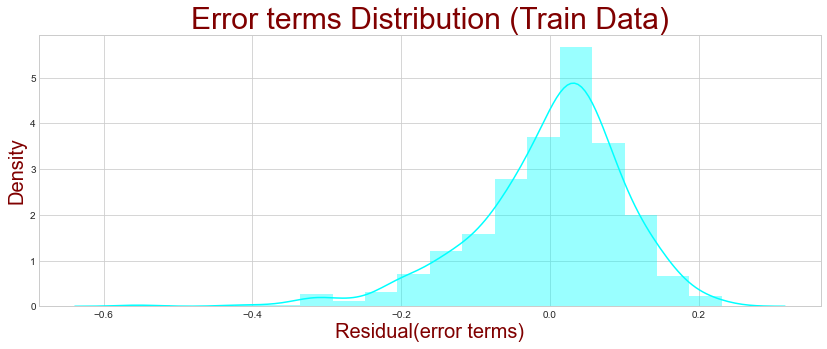

In [90]:
#plotting hist plot to analyse residuals

residual = y-y_pred

fig= plt.figure()
plt.figure(figsize = (14,5))
sns.distplot((residual), bins = 18, color='cyan')
plt.title('Error terms Distribution (Train Data)', fontsize=30,color='maroon')
plt.xlabel('Residual(error terms)', fontsize= 20,color='maroon')
plt.ylabel('Density', fontsize= 20,color='maroon')
plt.show()

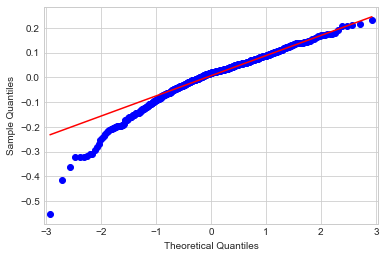

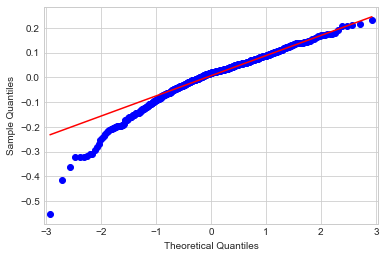

In [91]:
# Q-Q Plot : compare the residuals against normal distribution
sm.qqplot(residual, line='q')

#### Clearly the residuals are normally distributed around zero.

### 7.3.2 A linear relationship exists between X and Y
                                            

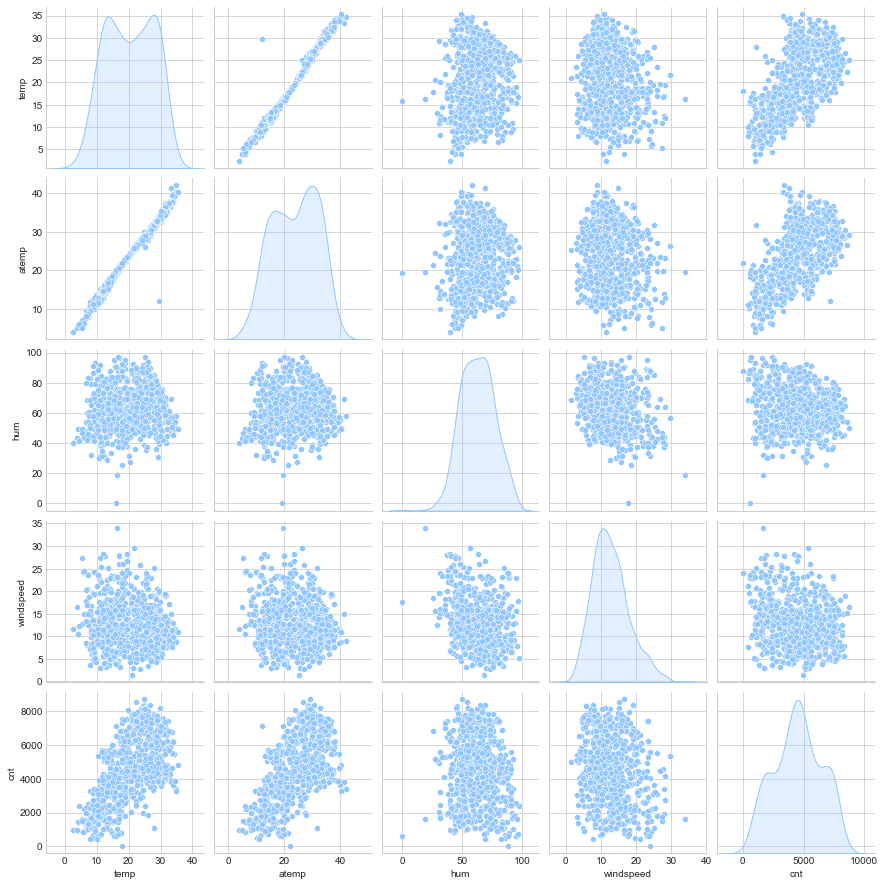

In [92]:
new_bike= new_bike[['temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(new_bike, diag_kind='kde')
plt.show()

#### Clearly, there is a linear relationship between the target variable cnt and couple of predictor variables temp and atemp. 

Other two, i.e hum and windspeed do not maintain a linear relationship with cnt. They are not part our Final model either.

### 7.3.3 There is no multicollinearity between predictor variables


In [93]:
get_vif(x_rfe)

,Predictors,VIF_Value
0,atemp,5.10
1,season_winter,2.08
2,yr,1.97
3,mnth_8,1.71
4,mnth_10,1.66
5,mnth_6,1.63
6,mnth_5,1.51
7,season_spring,1.44
8,mnth_9,1.40
9,mnth_4,1.28


Based on the VIF valaues obtained from our final model :


**atemp**  2.19

**yr** 1.92

**season_spring**  1.26

**season_winter**  1.30

**weathersit_Mist/Cloudy** 1.49

**mnth_9**  1.14

**weathersit_Light-Snow/Rain/Storm**  1.03

    All the VIF values are clearly below the range of 5 and hence within permissible limits

### 7.3.4 Homoscedasticity : Equal distribution of residuals across predictor variables

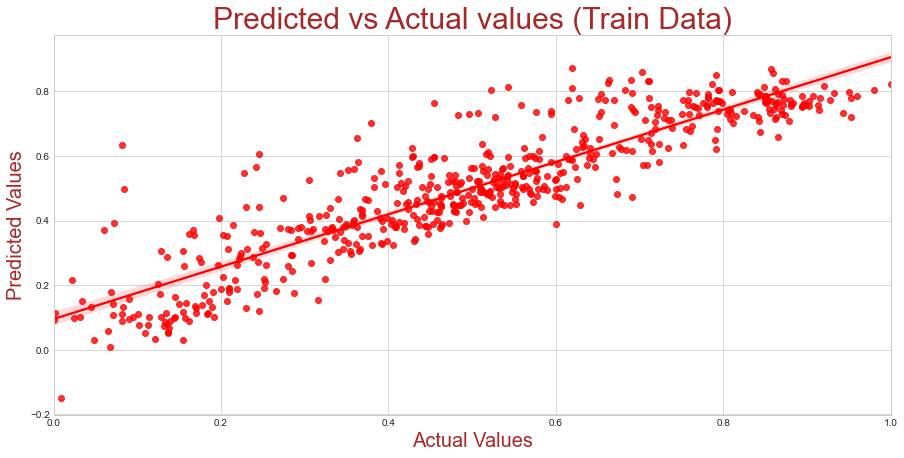

In [94]:
plt.figure(figsize = (15,7))
sns.regplot(x=y, y=y_pred, color='red')
plt.title ('Predicted vs Actual values (Train Data)' , fontsize=30, color='brown')
plt.xlabel("Actual Values", fontsize=20, color='brown')
plt.ylabel("Predicted Values", fontsize=20, color='brown')
plt.show()

#### Clearly the residuals seem to be equally distribted across the predicted value.

Hence, there exists an equal variance of residuals and we can be sure that there isn't any ambiguity or presence of high or low concentrated regions.

### 7.3.5 Error terms (residuals) are independent of predicted value.

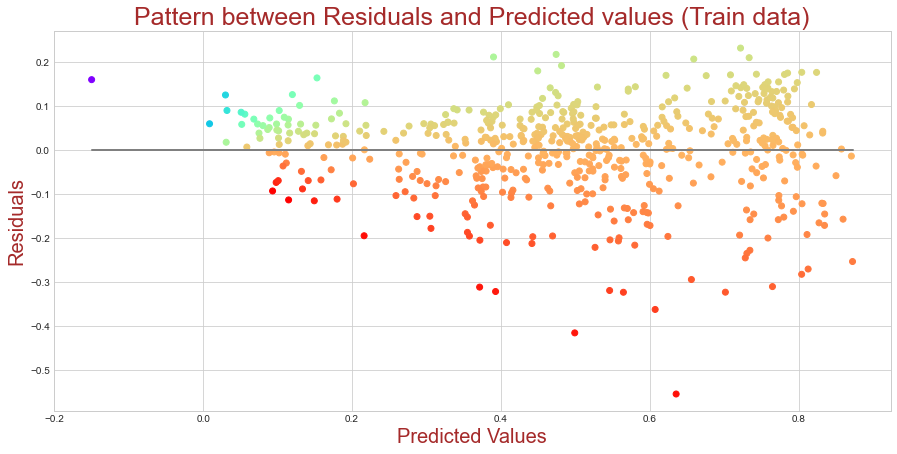

In [95]:
#test data
plt.figure(figsize = (15,7))

cmap=plt.cm.rainbow
#sns.regplot(x=y_pred, y=residual, color='orange')
x=y_pred
y=residual
plt.scatter(x, y, c= np.arctan2(x,y), cmap=cmap ,alpha = 1)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='grey')
plt.title ('Pattern between Residuals and Predicted values (Train data)' , fontsize=25, color= 'brown')
plt.xlabel("Predicted Values", fontsize=20, color= 'brown')
plt.ylabel("Residuals", fontsize=20, color= 'brown')
plt.show()


#### Clearly we don't see any pattern here as expected from our model. There is no specific relation between the residuals and predicted values 

Also, for this dataset, **the time series data might reflect autocorrelation as bike hire demand next year might depend on current year**. In such scenarios the regression model is likely to suffer due to autocorrelation.

As we know the **Durbin-Watson statistic is a test for autocorrelation** in a dataset, we have **Durbin-Watson statistic value : 1.874** and as it is slightly less than 2, this suggests there is a slight positive auto-correlation between some variables.
    
    
**NOTE : Durbin-Watson statistic value : 2 implies NO AUTOCORRELATION**

# # 8. Predict on Test Data

We will now anlyse and make predictions based on our test data as per the final model

### 8.1 Apply scaler to test data 

In [96]:
#Using scalar() on all numeric variables of test dataset, in order to make sure info leak between train and test

bike_num = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_test[bike_num] = scale.transform(bike_test[bike_num])

In [97]:
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light-Snow/Rain/Storm,weathersit_Mist/Cloudy
358,0,0,0,0.268714,0.263697,0.594623,0.331845,0.039759,1,0,...,0,1,0,0,0,0,0,0,0,0
246,0,0,0,0.809978,0.769676,0.679234,0.460323,0.555022,0,0,...,0,0,0,0,0,0,0,0,0,0
622,1,0,0,0.684333,0.665240,0.344548,0.562988,1.019572,0,0,...,0,0,0,0,0,0,0,1,0,0
309,0,0,0,0.360361,0.371854,0.668793,0.174207,0.396110,0,0,...,1,0,0,0,0,0,0,0,0,0
518,1,0,0,0.677065,0.651150,0.332946,0.404356,0.887494,0,1,...,0,0,0,0,0,0,0,0,0,0


In [98]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light-Snow/Rain/Storm,weathersit_Mist/Cloudy
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.554795,0.034247,0.650685,0.532468,0.504364,0.503861,0.429923,0.499146,0.260274,0.253425,...,0.068493,0.116438,0.123288,0.130137,0.171233,0.109589,0.150685,0.116438,0.047945,0.356164
std,0.498699,0.182488,0.478395,0.230854,0.217635,0.218260,0.207710,0.259679,0.440294,0.436469,...,0.253460,0.321854,0.329899,0.337612,0.378009,0.313452,0.358973,0.321854,0.214386,0.480513
min,0.000000,0.000000,0.000000,0.046591,0.025950,-0.353829,0.093308,-0.050345,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.347122,0.340982,0.358178,0.286147,0.279173,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.529616,0.515640,0.500580,0.406692,0.507939,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.722754,0.678719,0.656902,0.533830,0.699255,1.000000,0.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.970925,0.927898,0.940835,1.213032,1.019572,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


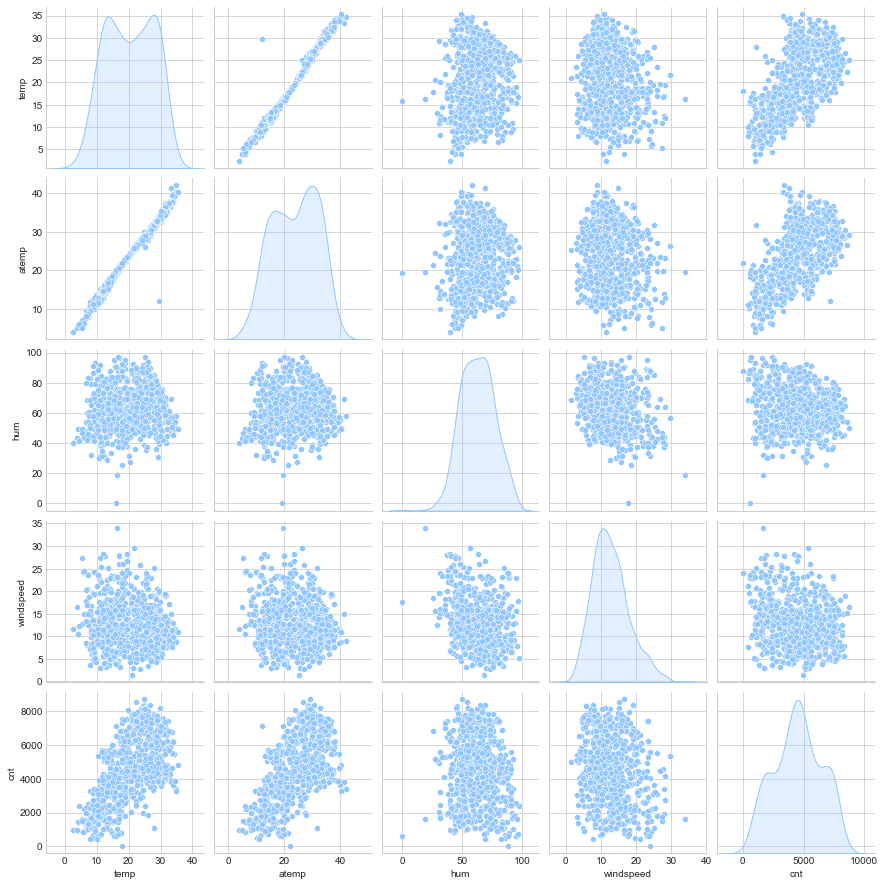

In [99]:
# ANALYZE NUMERICAL COULUMNS FOR TEST DATASET

bike_num = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_test[bike_num]
sns.pairplot(new_bike, diag_kind='kde')
plt.show()

#### There is a similar pattern as that of train data and bith, temp and atemp show a postive linear correlation with target variable 'cnt'.

#### Also, temp and atemp are multicollinear with each other.

### 8.2 Divide x_test and y_test

In [100]:
#setting up our target variable
y_test = bike_test.pop('cnt')

#setting up our test variables (features)
x_test= bike_test
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 358 to 472
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   yr                                146 non-null    int64  
 1   holiday                           146 non-null    int64  
 2   workingday                        146 non-null    int64  
 3   temp                              146 non-null    float64
 4   atemp                             146 non-null    float64
 5   hum                               146 non-null    float64
 6   windspeed                         146 non-null    float64
 7   season_spring                     146 non-null    uint8  
 8   season_summer                     146 non-null    uint8  
 9   season_winter                     146 non-null    uint8  
 10  mnth_2                            146 non-null    uint8  
 11  mnth_3                            146 non-null    uint8  
 12  mnth_4

In [101]:
## picking all variables which are part of our final model (filteringour required variables)

col_final = x_rfe.columns
x_test_new = x_test[col_final]
x_test_new

,yr,atemp,season_spring,season_winter,mnth_3,mnth_4,mnth_5,mnth_6,mnth_8,mnth_9,mnth_10,weathersit_Light-Snow/Rain/Storm
358,0,0.263697,1,0,0,0,0,0,0,0,0,0
246,0,0.769676,0,0,0,0,0,0,0,1,0,0
622,1,0.665240,0,0,0,0,0,0,0,1,0,0
309,0,0.371854,0,1,0,0,0,0,0,0,0,0
518,1,0.651150,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
342,0,0.313027,0,1,0,0,0,0,0,0,0,0
262,0,0.594817,0,0,0,0,0,0,0,1,0,0
677,1,0.362738,0,1,0,0,0,0,0,0,0,0
705,1,0.318824,0,1,0,0,0,0,0,0,0,0


In [102]:
## Add a constant variable to test dataset

x_test_new = sm.add_constant(x_test_new)
x_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 358 to 472
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   const                             146 non-null    float64
 1   yr                                146 non-null    int64  
 2   atemp                             146 non-null    float64
 3   season_spring                     146 non-null    uint8  
 4   season_winter                     146 non-null    uint8  
 5   mnth_3                            146 non-null    uint8  
 6   mnth_4                            146 non-null    uint8  
 7   mnth_5                            146 non-null    uint8  
 8   mnth_6                            146 non-null    uint8  
 9   mnth_8                            146 non-null    uint8  
 10  mnth_9                            146 non-null    uint8  
 11  mnth_10                           146 non-null    uint8  
 12  weathe

In [104]:
## make predictions based on final model

y_pred =  lr_m4.predict(x_test_new)

### 8.3 Linear Regression Assumptions Check for Test data

#### Residual analysis

<Figure size 432x288 with 0 Axes>

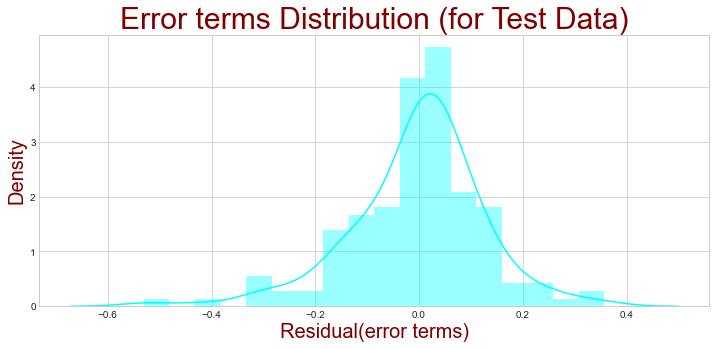

In [105]:
#plotting hist plot to analyse residuals

residual = y_test-y_pred

fig= plt.figure()
plt.figure(figsize = (12,5))
sns.distplot((residual), bins = 18, color='cyan')
plt.title('Error terms Distribution (for Test Data)', fontsize=30,color='maroon')
plt.xlabel('Residual(error terms)', fontsize= 20,color='maroon')
plt.ylabel('Density', fontsize= 20,color='maroon')
plt.show()

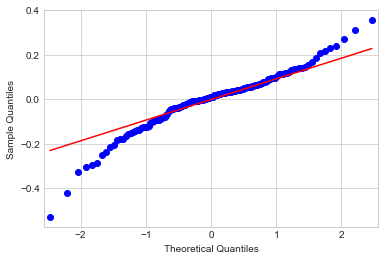

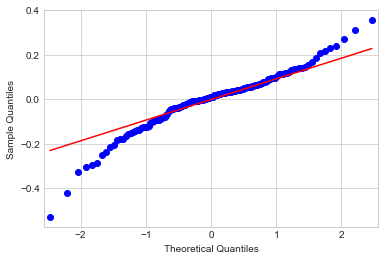

In [106]:
# Q-Q Plot : compare the residuals against normal distribution for Test data
residual = y_test-y_pred
sm.qqplot(residual, line='q')

#### This clearly reflects how our residuals are normally distributed 




#### Linearity check (already covered before using pair plot). No need to plot it again here.

#### Homoscedasticity check

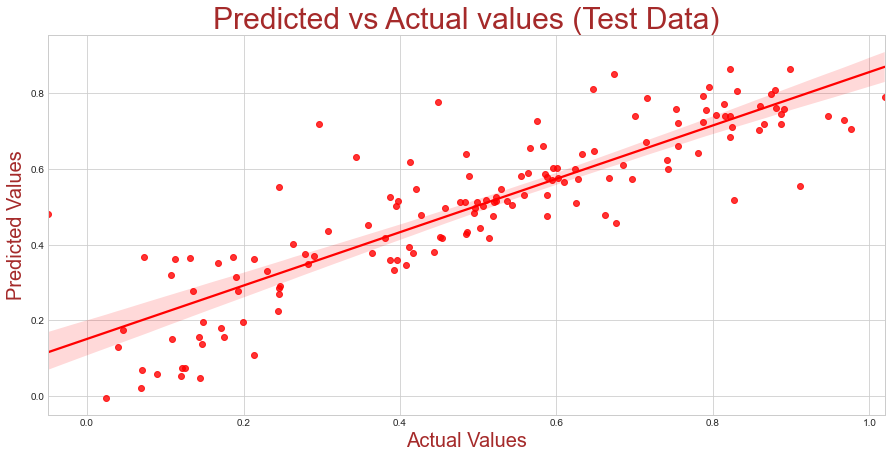

In [107]:
plt.figure(figsize = (15,7))
sns.regplot(x=y_test, y=y_pred, color='red')
plt.title ('Predicted vs Actual values (Test Data)' , fontsize=30, color='brown')
plt.xlabel("Actual Values", fontsize=20, color='brown')
plt.ylabel("Predicted Values", fontsize=20, color='brown')
plt.show()

#### Pattern check (between residuals and predicted values)

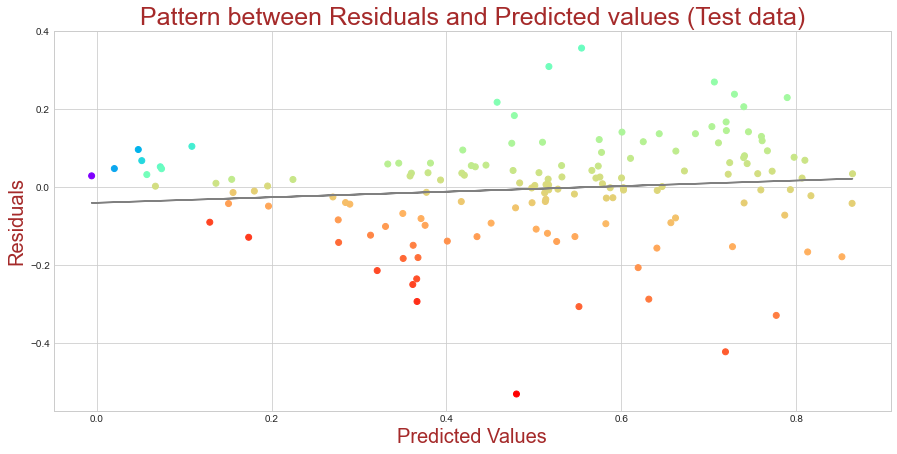

In [108]:
#test data
plt.figure(figsize = (15,7))

cmap=plt.cm.rainbow
#sns.regplot(x=y_pred, y=residual, color='orange')
x=y_pred
y=residual
plt.scatter(x, y, c= np.arctan2(x,y), cmap=cmap ,alpha = 1)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='grey')
plt.title ('Pattern between Residuals and Predicted values (Test data)' , fontsize=25, color= 'brown')
plt.xlabel("Predicted Values", fontsize=20, color= 'brown')
plt.ylabel("Residuals", fontsize=20, color= 'brown')
plt.show()


#### This clearly reflects as we don't see any pattern here as expected from our model. There is no specific relation between the residuals and predicted values


# # 9. Final Model Evaluation on Test Data

### 9.1 Final model accuracy analysis

<Figure size 432x288 with 0 Axes>

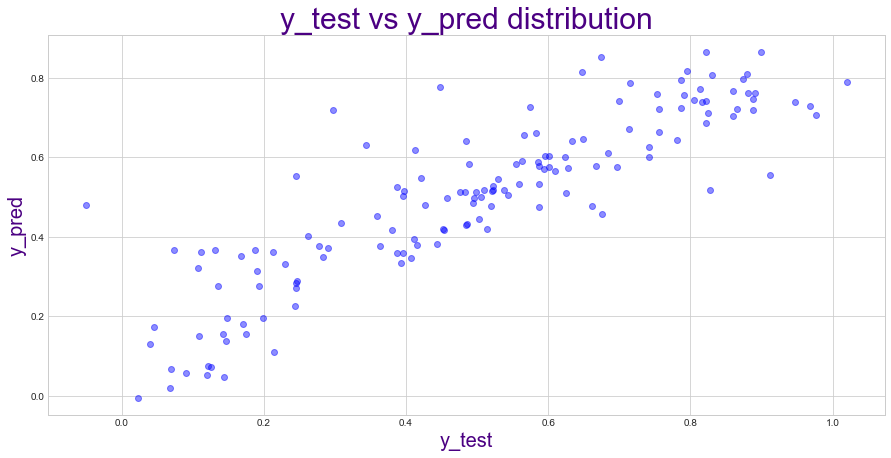

In [109]:
## Plot y_test and y_pred to see the accuracy of our final model
import matplotlib.cm as cm

fig= plt.figure()
c=cm.rainbow
plt.figure(figsize = (15,7))
plt.scatter(y_test, y_pred, alpha= 0.45, color = "blue")
plt.title ('y_test vs y_pred distribution' , fontsize=30, color='indigo')
plt.xlabel("y_test", fontsize=20, color='indigo')
plt.ylabel("y_pred", fontsize=20,  color='indigo')
plt.show()

#### It's clear from the above plot that our model is accurate enough to predict the demand for bikes.

The predicted and actual value points show a significant overlap throughout to indicate the change in demand as well

### 9.2  R-squared comparison for Test and Train 

In [110]:
#calculating R-squared value for test model

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.7527549280469394

#### For train data final model : R-squared = 0.830

### 9.3 Adjusted R-squared comparison

In [111]:
# evaluate the adjusted R squared for test model

r2 = 0.8068032076231737
x_row = x_test.shape[0]

#number of predictors
pred = x_test.shape[1]

#applying adjusted R squared formula
adj_r2 = 1-(1-r2)*(x_row-1)/(x_row-pred-1)
adj_r2

0.7585040095289671

# # Insights & Conclusion

#### As per the final model (Model-9), the best fit equation is :
    
    
**cnt** = 0.244843 + (yr x 0.237354) + (atemp x 0.413310) - (season_spring x -0.150225) + (mnth_9 x 0.0914) + (season_winter x 0.046886) - (weathersit_Light-Snow/Rain/Storm x -0.306459) - (weathersit_Mist/Cloudy x -0.077437)


**Top 5 predictors for our target variable are :**
    
    
   - **Feeling Temperature (atemp)**  It has coefficient value 0.4133. Hence, a unit increase in atemp will increase the number of hired bikes by 0.4133 units
    
 
   - **Year (yr)**  :  It has coefficient value 0.237. Hence, a unit increase in yr will increase the number of hired bikes by 0.237 units
   
    
  - **weathersit_Light-Snow/Rain/Storm**  :  It has coefficient value -0.306. Hence, a unit increase in weathersit_Light-Snow/Rain/Storm will decrease the number of hired bikes by -0.306 units  
    
 
 - **season_spring**  :  It has coefficient value -0.150. Hence, a unit increase in season_spring will decrease the number of hired bikes by -0.150 units
    
  
  - **September Month (mnth_9)** It has coefficient value 0.0914. Hence, a unit increase in mnth_9 will increase the number of hired bikes by 0.0914 units
    
    
    It is thus important to keep a check on the above to achieve maximum booking for bikes. 

**BoomBikes** must adopt a business plan with the following pointers in consideration :
    
    1. The rental count is likely to increase with an increase in temperature. So they should start marketing heavily 
    in regions that are higher in termperature and humidity
    
    2. Rental count is likely to decrease in regions with light rain/snow weather patterns. Hence the company should 
    not invest heavily in such regions as it will be an insignificant investment.
    
    3. Fall season encounters a heavy rise in rental count. Hence the company should focus on regions with heavy rainfall
    and specially during months July-October.
    
    4. On the other hand, rental count is likely to decrease during Spring season (Feb-April). So company can offer
    discounts or other offers that may enhance the numbers during Spring.
    
    5. Rental count is likely to high with every passing year. Hence company must plan accordingly in advance on supply of
    bikes per region.